## Stock Analysis 

### Volume Analysis - Part 1

Over the past couple of months, I have been thoroughly intrigued by the world of finance. The data science community can add a lot of value to the financial domain. In this notebook, I am investigating some of the metrics used to evaluate a stock. In my first attempt to model or program the financial world, we will analyze a stock based on volume.


In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Stock in Focus - Tata Power

#### 'Tata Power is the largest power generation company in India aimed at providing uninterrupted power supply from its various plants located across India.' - https://www.tatapower.com/

Tata power is a stock with great potential, which has seen a good uptrend in the past few months. The stock is slowly gaining substantial backing from a fundamental point of view as well. Please do your own DD!

I have retrieved 'daily' level data from https://www1.nseindia.com/products/content/equities/equities/eq_security.htm

You can also get data at a granular level with APIs provided by Zerodha and a few others - although they come at a price.

In [164]:
df = pd.read_csv('Tata_Power.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TATAPOWER,EQ,15-Jun-2020,41.70,41.70,43.00,41.55,42.50,42.40,42.43,32174680,1.365149e+09,54447,5760808,17.90
1,TATAPOWER,EQ,16-Jun-2020,42.40,43.45,43.45,40.20,41.05,41.05,41.77,33915142,1.416609e+09,47753,7304567,21.54
2,TATAPOWER,EQ,17-Jun-2020,41.05,40.90,42.20,40.15,41.10,41.25,41.23,30297033,1.249274e+09,42094,7457989,24.62
3,TATAPOWER,EQ,18-Jun-2020,41.25,41.10,43.35,41.10,43.05,42.95,42.52,29310786,1.246385e+09,46660,7019997,23.95
4,TATAPOWER,EQ,19-Jun-2020,42.95,43.45,43.95,42.80,43.05,43.20,43.47,28219725,1.226581e+09,48374,8056299,28.55


### Time Frame - Level of Analysis

The time frame that you use to study charts depends on the type of inverstor you are. If you are a short-term trader, you should be using daily charts for trading. If your trading period is longer than one year, you are better off using weekly charts, which help study the market from a longer-range perspective.

We will be doing the analysis on a 'daily' level.

In [165]:
df.shape

(250, 15)

In [166]:
print('Start of series:', df['Date'].iloc[0:1:], '\nEnd of series:', df['Date'].iloc[len(df)-1::])

Start of series: 0    15-Jun-2020
Name: Date, dtype: object 
End of series: 249    11-Jun-2021
Name: Date, dtype: object


In [167]:
df = df[['Date', 'High Price','Low Price','Prev Close','Close Price','Deliverable Qty']]

df.columns = ['Date','High','Low','PClose','Close','Volume']
df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index(df['Date'])
df.head()

,Date,High,Low,PClose,Close,Volume
0,2020-06-15,43.00,41.55,41.70,42.40,5760808
1,2020-06-16,43.45,40.20,42.40,41.05,7304567
2,2020-06-17,42.20,40.15,41.05,41.25,7457989
3,2020-06-18,43.35,41.10,41.25,42.95,7019997
4,2020-06-19,43.95,42.80,42.95,43.20,8056299


### 52W high and 52W low

This is one of the indicators which can be used to assess the current performance of the stock with respect to its previous high and low. The 52-week high/low is the highest and lowest price at which a security has traded during the time period that equates to one year and is viewed as a technical indicator. The 52-week high/low is based on the daily closing price for the given stock.



### 52W high

In [168]:
max(df['Close'])

127.6

### 52W low

In [169]:
#min(df_1['Low'])
df[['Low']].sort_values(by = 'Low').iloc[1,0]

40.2

### Volume Analysis - Amount of stocks traded on a given day

In [170]:
df['Volume'].describe().round()

count         250.0
mean      8040220.0
std       6124576.0
min        736987.0
25%       4329830.0
50%       6541601.0
75%      10249082.0
max      58376445.0
Name: Volume, dtype: float64

In [171]:
df[df['Volume'] == df['Volume'].max()]

,Date,High,Low,PClose,Close,Volume
247,2021-06-09,132.7,119.0,117.05,124.65,58376445


#### As the price of Tata Power has increased, the investor interest has improved - which is reflected in an increase in volume. 

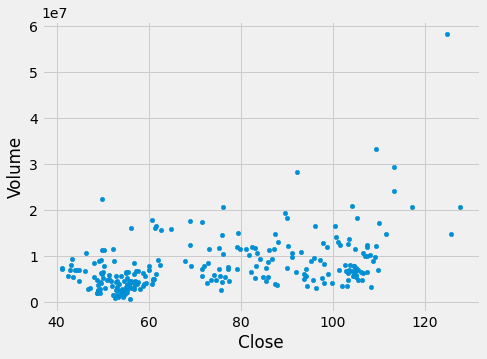

In [172]:
df.plot.scatter(x='Close', y='Volume', figsize=(7,5))
plt.show()

#### A correlation plot between Volume and some of the other metrics alone doesn't tell you much

<AxesSubplot:>

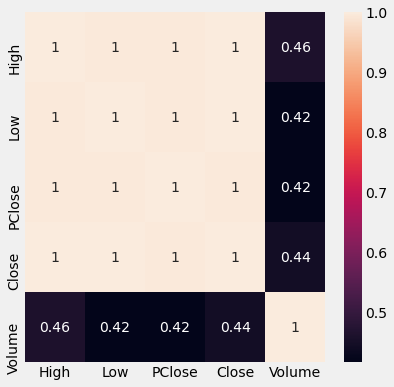

In [173]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,6))         
sns.heatmap(df.corr(), annot = True)

#### Let's introduce a few new metrics

1. Change - Change in Closing Price when compared to the Previous Day Closing Price
2. Abs_Change - In order to handle a price increase and decrease
3. %_change - % change in the price of the stock


In [174]:
df['Change'] = (df['Close'].diff())
df['Abs_Change'] = abs(df['Change'])
df.fillna(value = 0, inplace = True)
df['%_change'] = np.where(df['Abs_Change']!=0, (df['Change']*100/(df['Close']-df['Change'])).round(2), 0)

In [175]:
df[['Date','Change', 'Close', 'Abs_Change', '%_change']].tail()

,Date,Change,Close,Abs_Change,%_change
245,2021-06-07,5.20,113.35,5.20,4.81
246,2021-06-08,3.70,117.05,3.70,3.26
247,2021-06-09,7.60,124.65,7.60,6.49
248,2021-06-10,2.95,127.60,2.95,2.37
249,2021-06-11,-1.90,125.70,1.90,-1.49


#### Here we can observe that Volume is correlated to the Absolute Change in price on a given day

<AxesSubplot:>

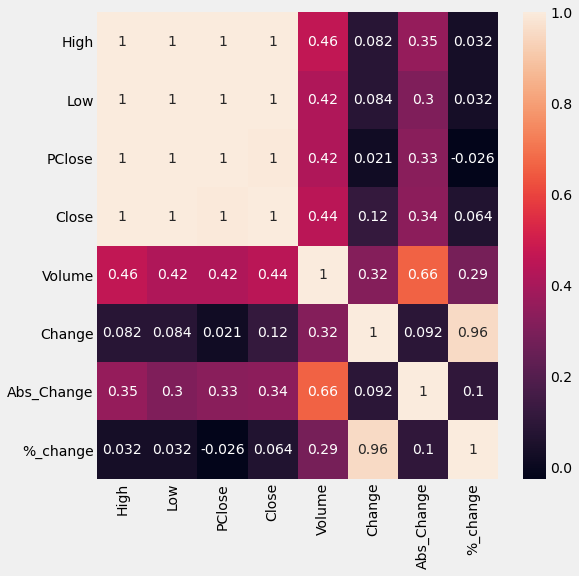

In [176]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))         
sns.heatmap(df.corr(), annot = True)

### Change in Price with respect to Volume


There are two types of price change.

1. One with conviction - increase/decrease in price with high volumes
2. Another that lacks conviction - increase/decrease in price with low volumes

In simple terms, if a price change is backed by high volumes, you can confirm a decrease or increase in price. It is always safe to only make a trade when it is backed by sufficient volume, or it might be a momentary bubble.

#### #1 Absolute Change in Price - These changes in price have been confirmed by huge volumes, it confirms our hypothesis

In [177]:
df[['PClose', 'Close', 'Volume', 'Abs_Change']].sort_values(by=['Abs_Change'], ascending = False).head(10)

,PClose,Close,Volume,Abs_Change
208,104.10,92.20,28259775,11.90
247,117.05,124.65,58376445,7.60
226,102.70,109.95,17331481,7.25
133,76.05,69.05,12423415,7.00
192,109.70,103.30,12742191,6.40
189,107.35,113.25,24289029,5.90
164,84.20,89.60,19438852,5.40
245,108.15,113.35,29517331,5.20
229,106.60,101.50,12534785,5.10
183,100.35,105.25,18324201,4.90


#### #2 Absolute Change in Price Percentage - Change in price can be more substantial when traded at different levels. 

In [178]:
df['%change_abs'] = abs(df['%_change'])
df.sort_values(by='%change_abs', ascending = False).head(10)

,Date,High,Low,PClose,Close,Volume,Change,Abs_Change,%_change,%change_abs
208,2021-04-12,101.00,89.90,104.10,92.20,28259775,-11.90,11.90,-11.43,11.43
133,2020-12-21,75.85,66.40,76.05,69.05,12423415,-7.00,7.00,-9.20,9.20
48,2020-08-20,62.30,56.00,56.70,61.40,16076056,4.70,4.70,8.29,8.29
13,2020-07-02,50.70,45.75,46.10,49.80,22382103,3.70,3.70,8.03,8.03
226,2021-05-10,110.50,103.20,102.70,109.95,17331481,7.25,7.25,7.06,7.06
247,2021-06-09,132.70,119.00,117.05,124.65,58376445,7.60,7.60,6.49,6.49
164,2021-02-04,90.50,84.45,84.20,89.60,19438852,5.40,5.40,6.41,6.41
119,2020-12-01,69.45,65.00,64.90,68.85,17810379,3.95,3.95,6.09,6.09
161,2021-02-01,81.20,74.50,75.40,79.90,11581974,4.50,4.50,5.97,5.97
43,2020-08-13,57.90,52.55,52.95,56.10,16242658,3.15,3.15,5.95,5.95


### Identifying inflection points concerning Volume


The goal here is to devise a strategy to identify points of inflection in volume. Here I am computing 5, 21, and 63 Moving Averages of Volume. Moving Averages are used heavily by Analysts as one of the indicators to evaluate stocks.

If the traded volume on a given day > 1.5 * Short Moving Average  - then we are seeing a great interest in this stock.
I plan on going more in-depth concerning Moving Averages in the coming notebooks. Here we will use a slightly naive approach to introduce this concept.

In [179]:
ShortEMA = df.Volume.ewm(span=5, adjust=False).mean()
MediumEMA = df.Volume.ewm(span=21, adjust=False).mean()
LongEMA = df.Volume.ewm(span=63, adjust=False).mean()
df['Short'] = ShortEMA.round()
df['Medium'] = MediumEMA.round()
df['Long'] = LongEMA.round()
df.head()

,Date,High,Low,PClose,Close,Volume,Change,Abs_Change,%_change,%change_abs,Short,Medium,Long
0,2020-06-15,43.00,41.55,41.70,42.40,5760808,0.00,0.00,0.00,0.00,5760808.0,5760808.0,5760808.0
1,2020-06-16,43.45,40.20,42.40,41.05,7304567,-1.35,1.35,-3.18,3.18,6275394.0,5901150.0,5809050.0
2,2020-06-17,42.20,40.15,41.05,41.25,7457989,0.20,0.20,0.49,0.49,6669593.0,6042681.0,5860580.0
3,2020-06-18,43.35,41.10,41.25,42.95,7019997,1.70,1.70,4.12,4.12,6786394.0,6131528.0,5896812.0
4,2020-06-19,43.95,42.80,42.95,43.20,8056299,0.25,0.25,0.58,0.58,7209696.0,6306507.0,5964296.0


#### Colour-coding points of Inflection based on strategy devised

In [181]:
def select_col(x):
    c1 = 'background-color: green'
    c2 = '' 
    #compare columns
    mask = x['Volume'] > x['Short']*1.5
    #DataFrame with same index and columns names as original filled empty strings
    df1 =  pd.DataFrame(c2, index=x.index, columns=x.columns)
    #modify values of df1 column by boolean mask
    df1.loc[mask, 'Volume'] = c1
    return df1

df[['Date', 'Volume', 'Short']].style.apply(select_col, axis=None)

,Date,Volume,Short
0,2020-06-15 00:00:00,5760808,5760808.000000
1,2020-06-16 00:00:00,7304567,6275394.000000
2,2020-06-17 00:00:00,7457989,6669593.000000
3,2020-06-18 00:00:00,7019997,6786394.000000
4,2020-06-19 00:00:00,8056299,7209696.000000
5,2020-06-22 00:00:00,5497429,6638940.000000
6,2020-06-23 00:00:00,7143298,6807059.000000
7,2020-06-24 00:00:00,9338635,7650918.000000
8,2020-06-25 00:00:00,7016687,7439508.000000
9,2020-06-26 00:00:00,10843138,8574051.000000


## What I plan on covering next

1. Price Analysis and Trend in the last FY
2. Performance of stock with respect to - NIFTY/ NIFTY Power index
3. Comparison between stocks in the same industry - Adani Power, Powergrid, NTPC, IEX
4. Moving Average - introduction to technical analysis  